<a href="https://colab.research.google.com/github/shreytanwar/MNIST-CNN-and-KNN/blob/main/Flower%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing for kaggle



In [47]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"mxddie","key":"4e8b7d8396acc653f0a426b341de587d"}'}

In [48]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [49]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 62 Dec  6 13:59 kaggle.json
{"username":"mxddie","key":"4e8b7d8396acc653f0a426b341de587d"}

In [50]:
!pip install -q kaggle
!pip install -q kaggle-cli

In [51]:
# !kaggle datasets list

In [52]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [53]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [54]:
# present working directory
!pwd

/content/gdrive/My Drive/Kaggle


In [55]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [56]:
# change dataset api
! kaggle datasets download -d ayaanmustafa/flower

 99% 257M/259M [00:02<00:00, 105MB/s]
100% 259M/259M [00:02<00:00, 106MB/s]


In [57]:
# list
!ls

 Dataset3.csv   flowers   flower.zip  'kaggle (1).json'   kaggle.json


In [ ]:
# unzip and remove
!unzip \*.zip && rm *.zip

##Data Preprocessing

In [32]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import random as rn
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D,GlobalAvgPool2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.optimizers import Adam
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [33]:
labels = os.listdir('/content/gdrive/MyDrive/Kaggle/flower_images/training')
print(labels)

['lotus', 'rose', 'sunflower']


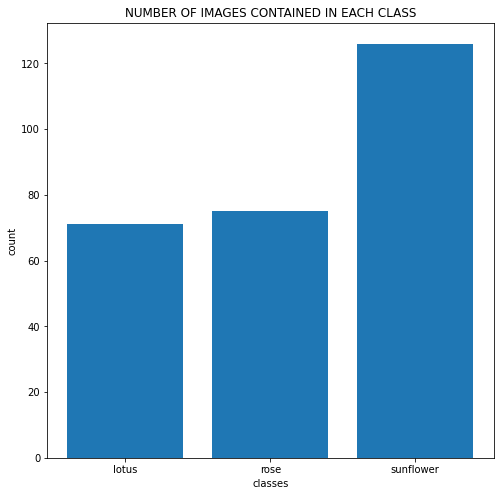

In [34]:
num = []
for label in labels:
    path = '/content/gdrive/MyDrive/Kaggle/flower_images/training/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    for image_path in folder_data:
        k = k+1
    num.append(k)
   
plt.figure(figsize = (8,8))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.ylabel('count')
plt.show()

In [35]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = '/content/gdrive/MyDrive/Kaggle/flower_images/training/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path,cv2.IMREAD_COLOR)
        image_resized = cv2.resize(image, (150,150))
        x_data.append(np.array(image_resized))
        y_data.append(label)

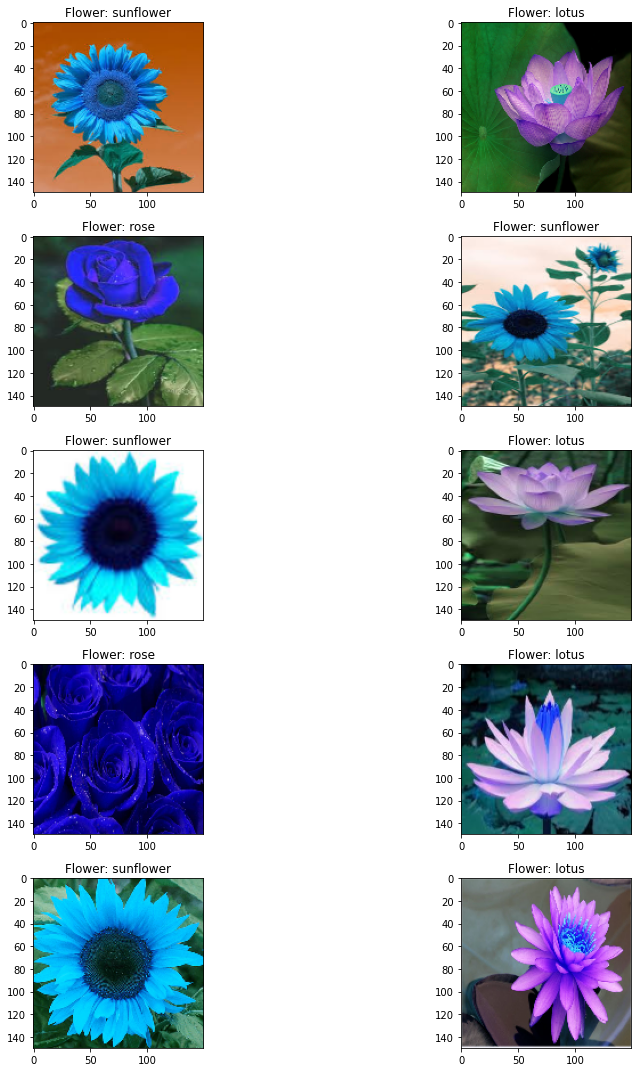

In [36]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(y_data))
        ax[i,j].imshow(x_data[l])
        ax[i,j].set_title('Flower: '+y_data[l])
        
plt.tight_layout()

In [37]:
le=LabelEncoder()
Y=le.fit_transform(y_data)
Y=to_categorical(Y,3)
for x_item in x_data:
  x_item = x_item/255

In [38]:
x_data = np.array(x_data)

y_data = np.array(y_data)

print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)

the shape of X is:  (272, 150, 150, 3) and that of Y is:  (272,)


##Classifier

Keras CNN

In [39]:
import tensorflow as tf
import keras
import keras.models
from keras.models import Sequential
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [40]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))

model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(3, activation = "softmax"))

In [41]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc'])

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      1216      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1440000)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               368640256 
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

VALIDATION SET


In [43]:
test_label = os.listdir('/content/gdrive/MyDrive/Kaggle/flower_images/validation/')
print(test_label)

['lotus_val', 'rose_val', 'sunflower_val']


In [44]:
x_test =[]
y_test = []

for label in test_label:
    path = '/content/gdrive/MyDrive/Kaggle/flower_images/validation/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path,cv2.IMREAD_COLOR)
        image_resized = cv2.resize(image, (150,150))
        x_test.append(np.array(image_resized))
        y_test.append(label)

In [45]:
x_test = np.array(x_test)
x_test = x_test/255
y_test = np.array(y_test)
le = LabelEncoder()
y = le.fit_transform(y_test)
y = to_categorical(y,3)

In [46]:
x_test.shape,y.shape

((59, 150, 150, 3), (59, 3))

In [47]:
datagen = ImageDataGenerator(
        rotation_range=10,
        featurewise_center=True,
        featurewise_std_normalization=True,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

datagen.fit(x_data)

val_datagen = ImageDataGenerator(
        rotation_range=90,
        featurewise_center=True,
        featurewise_std_normalization=True,
         width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_datagen.fit(x_test)

Stop after 7 iterations of no improvement in validation losS

In [48]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')

In [49]:
History = model.fit(x_data,Y,epochs = 100, validation_data = (x_test,y),
                    verbose = 1,callbacks=[early_stop])

Epoch 1/100
9/9 [==============================] - 52s 6s/step - loss: 10453.4053 - acc: 0.3125 - val_loss: 1.8902 - val_acc: 0.5254
Epoch 2/100
9/9 [==============================] - 49s 5s/step - loss: 216.4886 - acc: 0.6213 - val_loss: 0.9667 - val_acc: 0.4915
Epoch 3/100
9/9 [==============================] - 50s 6s/step - loss: 30.9562 - acc: 0.8162 - val_loss: 0.5396 - val_acc: 0.7627
Epoch 4/100
9/9 [==============================] - 48s 5s/step - loss: 10.7482 - acc: 0.8897 - val_loss: 0.8739 - val_acc: 0.5763
Epoch 5/100
9/9 [==============================] - 49s 5s/step - loss: 10.1582 - acc: 0.9191 - val_loss: 0.4107 - val_acc: 0.9153
Epoch 6/100
9/9 [==============================] - 49s 5s/step - loss: 2.5740 - acc: 0.9632 - val_loss: 0.3876 - val_acc: 0.9661
Epoch 7/100
9/9 [==============================] - 48s 5s/step - loss: 1.4412 - acc: 0.9743 - val_loss: 0.4325 - val_acc: 0.9322
Epoch 8/100
9/9 [==============================] - 49s 5s/step - loss: 0.6609 - acc: 0.9

##Results

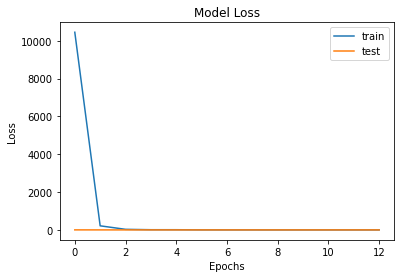

In [55]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

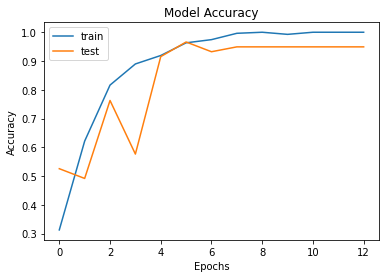

In [56]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Flower belongs to class %d 0


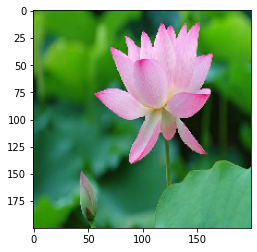

In [70]:
path = ('/content/gdrive/MyDrive/Kaggle/flower_images/validation/lotus_val/National-Flower-4_1.jpg')
img = image.load_img(path, target_size=(200, 200,3))
#img = img.reshape(64,64,1)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=model.predict_classes(img)
print('Flower belongs to class ', result[0])

Flower belongs to class  1


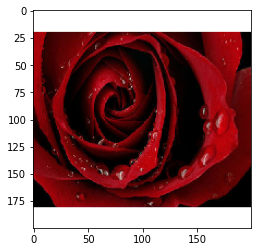

In [71]:
path = ('/content/gdrive/MyDrive/Kaggle/flower_images/validation/rose_val/red-rose-flower-500x500.jpg')
img = image.load_img(path, target_size=(200, 200,3))
#img = img.reshape(64,64,1)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=model.predict_classes(img)
print('Flower belongs to class ', result[0])

Flower belongs to class  2


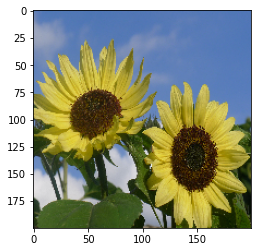

In [72]:
path = ('/content/gdrive/MyDrive/Kaggle/flower_images/validation/sunflower_val/Sunflower-Moonshine-2-flowers-P1050927.jpg')
img = image.load_img(path, target_size=(200, 200,3))
#img = img.reshape(64,64,1)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=model.predict_classes(img)
print('Flower belongs to class ', result[0])